In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
# from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, accuracy_score,classification_report,
                             auc, average_precision_score,roc_curve,roc_auc_score,
                             precision_recall_curve, precision_recall_fscore_support)

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

<h3 style="color:orange">Load Data</h3>

In [2]:
data1=np.loadtxt("./statlog+landsat+satellite/sat.trn")
data2=np.loadtxt("./statlog+landsat+satellite/sat.tst")

data=np.concat([data1,data2])

data=pd.DataFrame(data)

data.to_csv("./temp/data.csv",index=False)
# data.iloc[:,-1].unique()
data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,3.0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,3.0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,3.0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,3.0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60.0,83.0,96.0,85.0,64.0,87.0,100.0,88.0,64.0,83.0,...,92.0,66.0,87.0,108.0,89.0,63.0,83.0,104.0,85.0,1.0
6431,64.0,79.0,100.0,85.0,56.0,71.0,96.0,85.0,56.0,68.0,...,85.0,66.0,83.0,100.0,85.0,63.0,83.0,100.0,81.0,1.0
6432,56.0,68.0,91.0,81.0,56.0,64.0,91.0,81.0,53.0,64.0,...,81.0,59.0,87.0,96.0,81.0,63.0,83.0,92.0,74.0,5.0
6433,56.0,68.0,87.0,74.0,60.0,71.0,91.0,81.0,60.0,64.0,...,74.0,59.0,83.0,92.0,74.0,59.0,83.0,92.0,70.0,5.0


In [3]:
## checking duplicate and null values
print(f"\u001b[33mSum Duplicate:\u001b[0m {data.duplicated().sum()}")
print(f"\u001b[33mSum NaN Value: \u001b[0m{data.isna().sum().sum()}")

Sum Duplicate: 0
Sum NaN Value: 0


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,...,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361,3.668687
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,...,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274,2.214052
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,2.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,...,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


<h3 style="color:orange">split data (x,y)</h3>

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1].astype(int)

print(x.shape)
print(y.shape)
classes_name=np.array(sorted(y.unique()))
# print(classes_name)
print(y.value_counts())

(6435, 36)
(6435,)
36
1    1533
7    1508
3    1358
5     707
2     703
4     626
Name: count, dtype: int64


<h3 style="color:orange">viwe class distributions</h3>

In [6]:
y.value_counts()

36
1    1533
7    1508
3    1358
5     707
2     703
4     626
Name: count, dtype: int64

Text(0.5, 1.0, 'class distribution of dataset')

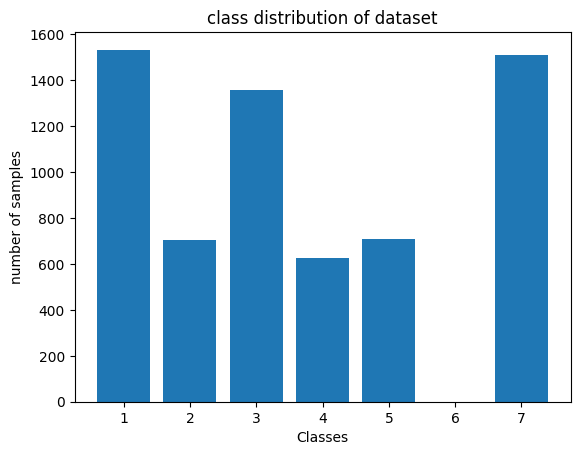

In [7]:
arr={}

for k,v in y.value_counts().items():
    arr[k]=v

arr={k:arr[k] for k in sorted(arr)}

plt.bar(arr.keys(),arr.values())
plt.xlabel("Classes")
plt.ylabel("number of samples")
plt.title("class distribution of dataset")

<h3 style="color:orange">Standarization</h3>

In [8]:
st=StandardScaler()
x=st.fit_transform(x)

x=pd.DataFrame(x,columns=[f"feature {i+1}" for i in range(x.shape[1])])
x.describe()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,feature 27,feature 28,feature 29,feature 30,feature 31,feature 32,feature 33,feature 34,feature 35,feature 36
count,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,...,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03
mean,-3.975064e-16,8.833476e-17,-3.710060e-16,-1.236687e-16,-5.300086e-16,1.148352e-16,1.634193e-16,2.605875e-16,1.501691e-16,1.943365e-16,...,3.886729e-16,1.987532e-16,-2.031700e-16,-1.060017e-16,3.091717e-16,2.650043e-17,-4.328403e-16,2.075867e-16,1.457524e-16,2.650043e-17
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,...,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-2.234503e+00,-2.473503e+00,-2.781110e+00,-2.624479e+00,-2.223448e+00,-2.457689e+00,-2.947324e+00,-2.824640e+00,-2.146497e+00,-2.444966e+00,...,-2.962742e+00,-2.825759e+00,-2.219453e+00,-2.457631e+00,-2.940302e+00,-2.815750e+00,-2.218383e+00,-2.448321e+00,-2.930722e+00,-2.808269e+00
25%,-6.909319e-01,-5.504642e-01,-8.585701e-01,-7.193347e-01,-6.747917e-01,-5.350082e-01,-8.468355e-01,-7.126460e-01,-6.616667e-01,-5.202465e-01,...,-8.557325e-01,-7.193653e-01,-6.629334e-01,-5.316430e-01,-8.448711e-01,-7.151505e-01,-6.512849e-01,-5.197809e-01,-8.341842e-01,-7.613246e-01
50%,-1.029047e-01,1.488226e-01,1.026998e-01,-8.428656e-02,-8.482742e-02,7.675376e-02,1.133877e-01,-7.904796e-02,-1.419761e-01,9.216410e-02,...,4.727147e-02,-8.744724e-02,-6.997343e-02,8.117118e-02,5.317078e-02,-8.497064e-02,-1.289187e-01,5.001508e-02,6.433199e-02,-7.901000e-02
75%,7.791360e-01,8.481093e-01,8.236521e-01,4.978409e-01,8.001190e-01,8.633049e-01,8.335550e-01,5.017503e-01,7.489221e-01,8.358056e-01,...,8.298749e-01,4.918109e-01,7.453466e-01,8.690752e-01,8.314738e-01,4.926943e-01,7.665661e-01,8.827938e-01,8.430460e-01,4.983332e-01
max,2.543217e+00,2.334094e+00,2.445795e+00,3.778923e+00,2.570012e+00,2.349013e+00,2.754001e+00,3.933740e+00,2.604960e+00,2.060627e+00,...,2.455282e+00,3.756721e+00,2.598347e+00,2.050931e+00,2.747296e+00,3.906169e+00,2.632160e+00,2.066216e+00,2.759880e+00,3.909906e+00


<h3 style="color:orange">Split data</h3>

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,stratify=y,random_state=42)

print(f"x train: {x_train.shape}, y train: {y_train.shape}\nx test: {x_test.shape}, y test: {y_test.shape}\n")

x train: (4504, 36), y train: (4504,)
x test: (1931, 36), y test: (1931,)



<h3 style="color:orange">Models</h3>

In [10]:
model_scores={"Dummy":dict(),"Logistic Regression":dict(),"DecssionTree Classifier":dict(),
              "KNN Classifier":dict(),"Gaussian Naive bayes":dict(),"Support Vector Classifier":dict(),
              "Random Forest Classifier":dict(),"XG boost classifier":dict(),"other":dict()}

for temp in model_scores.keys():
    model_scores[temp]={"scores":dict(),"ROC":list(),"PRC":list()}

print(model_scores)

{'Dummy': {'scores': {}, 'ROC': [], 'PRC': []}, 'Logistic Regression': {'scores': {}, 'ROC': [], 'PRC': []}, 'DecssionTree Classifier': {'scores': {}, 'ROC': [], 'PRC': []}, 'KNN Classifier': {'scores': {}, 'ROC': [], 'PRC': []}, 'Gaussian Naive bayes': {'scores': {}, 'ROC': [], 'PRC': []}, 'Support Vector Classifier': {'scores': {}, 'ROC': [], 'PRC': []}, 'Random Forest Classifier': {'scores': {}, 'ROC': [], 'PRC': []}, 'XG boost classifier': {'scores': {}, 'ROC': [], 'PRC': []}, 'other': {'scores': {}, 'ROC': [], 'PRC': []}}


<h5 style="color:cyan">Dummy classifier</h5>

Dummy Accuracy: 0.23821853961677888
Accuracy on orignal vs predicted values: 0.23821853961677888
Confusion Matrix:
 [[460   0   0   0   0   0]
 [211   0   0   0   0   0]
 [407   0   0   0   0   0]
 [188   0   0   0   0   0]
 [212   0   0   0   0   0]
 [453   0   0   0   0   0]]
Report: 
1: {'precision': 0.23821853961677888, 'recall': 1.0, 'f1-score': 0.3847762442492681, 'support': 460.0}
2: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 211.0}
3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 407.0}
4: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 188.0}
5: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 212.0}
7: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 453.0}
accuracy: 0.23821853961677888
macro avg: {'precision': 0.039703089936129816, 'recall': 0.16666666666666666, 'f1-score': 0.06412937404154469, 'support': 1931.0}
weighted avg: {'precision': 0.05674807261715085, 'recall': 0.23821853961677888, 'f1-score

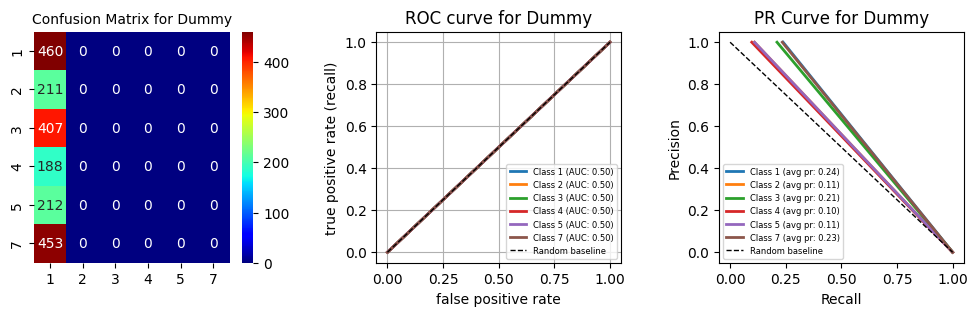

In [11]:
model=DummyClassifier(strategy="prior")
model_name="Dummy"

y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")


plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">Logistic regression</h5>

Logistic Regression Accuracy: 0.8586224754013465
Accuracy on orignal vs predicted values: 0.8586224754013465
Confusion Matrix:
 [[451   0   7   0   2   0]
 [  1 199   0   0  11   0]
 [  5   0 379  21   1   1]
 [  2   1  42  68   6  69]
 [ 17   4   0   1 163  27]
 [  0   0   5  37  13 398]]
Report: 
1: {'precision': 0.9474789915966386, 'recall': 0.9804347826086957, 'f1-score': 0.9636752136752137, 'support': 460.0}
2: {'precision': 0.9754901960784313, 'recall': 0.943127962085308, 'f1-score': 0.9590361445783132, 'support': 211.0}
3: {'precision': 0.8752886836027713, 'recall': 0.9312039312039312, 'f1-score': 0.9023809523809524, 'support': 407.0}
4: {'precision': 0.5354330708661418, 'recall': 0.3617021276595745, 'f1-score': 0.43174603174603177, 'support': 188.0}
5: {'precision': 0.8316326530612245, 'recall': 0.7688679245283019, 'f1-score': 0.7990196078431373, 'support': 212.0}
7: {'precision': 0.804040404040404, 'recall': 0.8785871964679912, 'f1-score': 0.8396624472573839, 'support': 453.0}

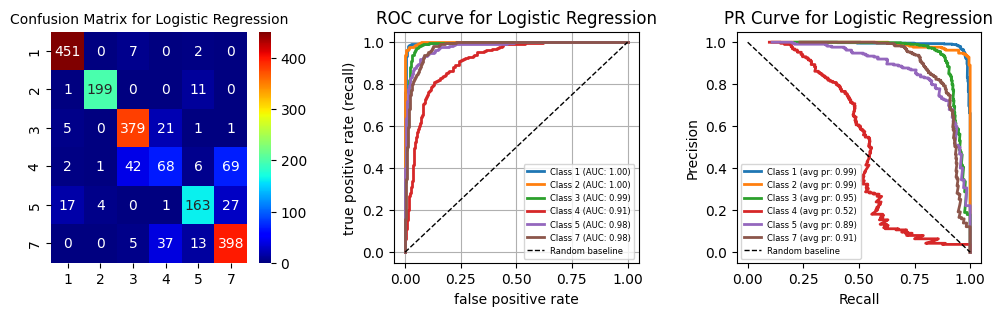

In [12]:
model=LogisticRegression(solver="lbfgs")
model_name="Logistic Regression"
y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">DecssionTree classifer</h5>

DecssionTree Classifier Accuracy: 0.8342827550491974
Accuracy on orignal vs predicted values: 0.8342827550491974
Confusion Matrix:
 [[438   0   7   1  12   2]
 [  0 200   1   4   4   2]
 [  7   0 350  32   1  17]
 [  3   2  35  86   7  55]
 [ 19   3   2   2 171  15]
 [  3   1  10  53  20 366]]
Report: 
1: {'precision': 0.9319148936170213, 'recall': 0.9521739130434783, 'f1-score': 0.9419354838709677, 'support': 460.0}
2: {'precision': 0.970873786407767, 'recall': 0.9478672985781991, 'f1-score': 0.9592326139088729, 'support': 211.0}
3: {'precision': 0.8641975308641975, 'recall': 0.85995085995086, 'f1-score': 0.8620689655172413, 'support': 407.0}
4: {'precision': 0.48314606741573035, 'recall': 0.4574468085106383, 'f1-score': 0.46994535519125685, 'support': 188.0}
5: {'precision': 0.7953488372093023, 'recall': 0.8066037735849056, 'f1-score': 0.8009367681498829, 'support': 212.0}
7: {'precision': 0.8008752735229759, 'recall': 0.8079470198675497, 'f1-score': 0.8043956043956044, 'support': 45

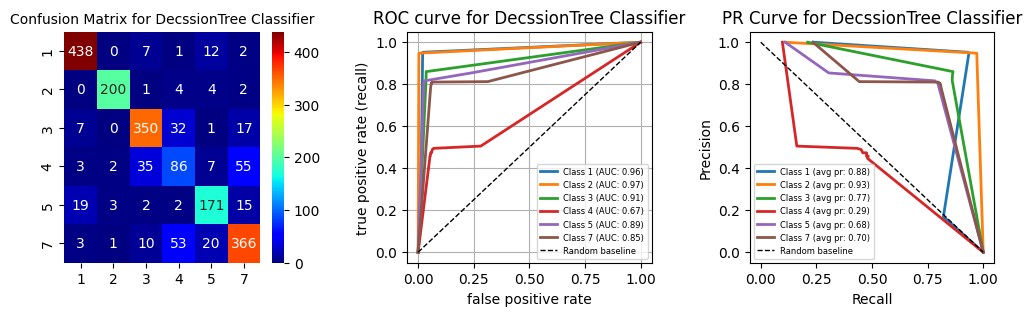

In [13]:
model=DecisionTreeClassifier(criterion="gini",max_depth=15)
model_name="DecssionTree Classifier"
y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">KNN Classifer</h5>

optimla value of K:3


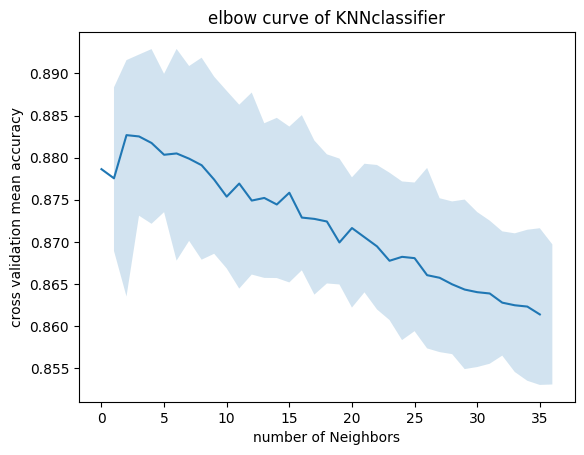

In [14]:
mean_score=[]
std_score=[]
for k in range(1,x_train.shape[1]+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y, cv=5, scoring='accuracy')
    mean_score.append(np.mean(scores))
    std_score.append(np.std(scores))

mean_score=np.array(mean_score)
std_score=np.array(std_score)

plt.plot(mean_score)
plt.fill_between(range(1,x.shape[1]+1),mean_score-std_score,mean_score+std_score,alpha=0.2)
plt.title("elbow curve of KNNclassifier")
plt.xlabel("number of Neighbors")
plt.ylabel("cross validation mean accuracy")
# print(acc_score)
K=np.argmax(mean_score)+1
print(f"optimla value of K:{K}")

KNN Classifier Accuracy: 0.9166235111341274
Accuracy on orignal vs predicted values: 0.9166235111341274
Confusion Matrix:
 [[453   0   5   1   1   0]
 [  0 205   0   1   3   2]
 [  4   2 383  14   0   4]
 [  1   1  35 128   2  21]
 [  6   3   0   2 196   5]
 [  0   0   9  30   9 405]]
Report: 
1: {'precision': 0.9762931034482759, 'recall': 0.9847826086956522, 'f1-score': 0.9805194805194806, 'support': 460.0}
2: {'precision': 0.9715639810426541, 'recall': 0.9715639810426541, 'f1-score': 0.9715639810426541, 'support': 211.0}
3: {'precision': 0.8865740740740741, 'recall': 0.941031941031941, 'f1-score': 0.9129916567342073, 'support': 407.0}
4: {'precision': 0.7272727272727273, 'recall': 0.6808510638297872, 'f1-score': 0.7032967032967034, 'support': 188.0}
5: {'precision': 0.9289099526066351, 'recall': 0.9245283018867925, 'f1-score': 0.9267139479905437, 'support': 212.0}
7: {'precision': 0.9267734553775744, 'recall': 0.8940397350993378, 'f1-score': 0.9101123595505618, 'support': 453.0}
accu

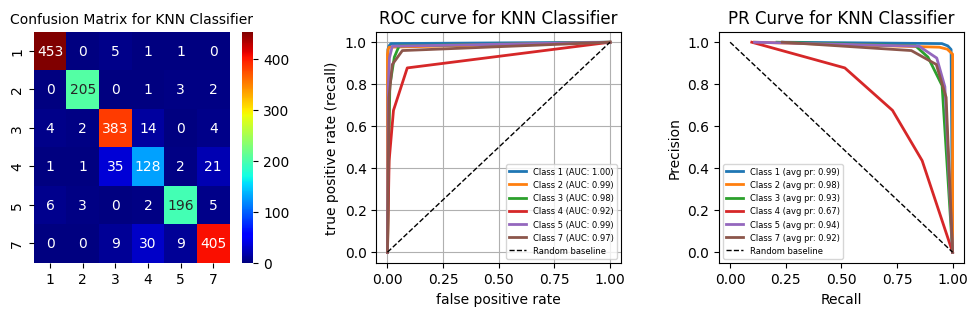

In [15]:
model=KNeighborsClassifier(K)
model_name="KNN Classifier"
y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">gaussian Naive bayes</h5>

Gaussian Naive bayes Accuracy: 0.7933713102019679
Accuracy on orignal vs predicted values: 0.7933713102019679
Confusion Matrix:
 [[363   0  15   0  82   0]
 [  9 190   0   2   9   1]
 [  7   0 372  27   0   1]
 [  1   0  33 114   6  34]
 [ 22   1   0   3 161  25]
 [  1   0   4  88  28 332]]
Report: 
1: {'precision': 0.9007444168734491, 'recall': 0.7891304347826087, 'f1-score': 0.8412514484356894, 'support': 460.0}
2: {'precision': 0.9947643979057592, 'recall': 0.9004739336492891, 'f1-score': 0.945273631840796, 'support': 211.0}
3: {'precision': 0.8773584905660378, 'recall': 0.914004914004914, 'f1-score': 0.8953068592057761, 'support': 407.0}
4: {'precision': 0.48717948717948717, 'recall': 0.6063829787234043, 'f1-score': 0.5402843601895735, 'support': 188.0}
5: {'precision': 0.5629370629370629, 'recall': 0.7594339622641509, 'f1-score': 0.6465863453815262, 'support': 212.0}
7: {'precision': 0.8447837150127226, 'recall': 0.7328918322295805, 'f1-score': 0.7848699763593381, 'support': 453.0

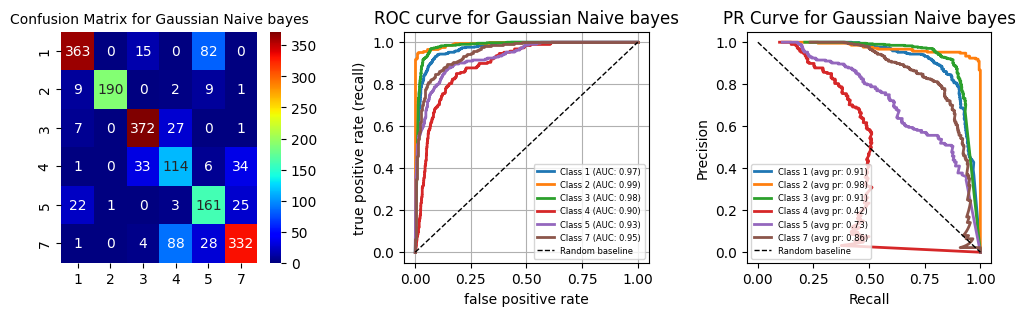

In [16]:
model=GaussianNB()
model_name="Gaussian Naive bayes"
y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">Support Vector Classifer</h5>

Support Vector Classifier Accuracy: 0.8974624546866908
Accuracy on orignal vs predicted values: 0.8974624546866908
Confusion Matrix:
 [[455   0   4   0   1   0]
 [  0 204   0   2   4   1]
 [  4   2 386  14   0   1]
 [  1   1  41 113   2  30]
 [ 11   2   0   0 184  15]
 [  0   1   9  44   8 391]]
Report: 
1: {'precision': 0.9660297239915074, 'recall': 0.9891304347826086, 'f1-score': 0.9774436090225563, 'support': 460.0}
2: {'precision': 0.9714285714285714, 'recall': 0.966824644549763, 'f1-score': 0.9691211401425178, 'support': 211.0}
3: {'precision': 0.8772727272727273, 'recall': 0.9484029484029484, 'f1-score': 0.911452184179457, 'support': 407.0}
4: {'precision': 0.653179190751445, 'recall': 0.601063829787234, 'f1-score': 0.6260387811634349, 'support': 188.0}
5: {'precision': 0.9246231155778895, 'recall': 0.8679245283018868, 'f1-score': 0.8953771289537713, 'support': 212.0}
7: {'precision': 0.8926940639269406, 'recall': 0.8631346578366446, 'f1-score': 0.877665544332211, 'support': 453.

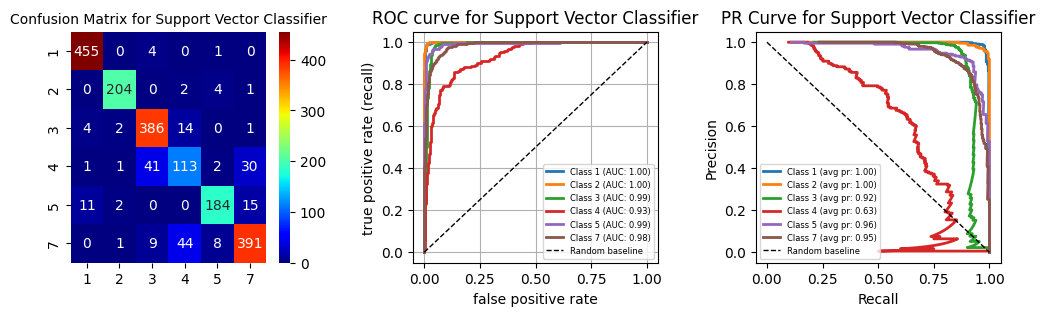

In [17]:
model=SVC(probability=True)
model_name="Support Vector Classifier"
y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">Random Forest</h5>

Random Forest Classifier Accuracy: 0.9145520455722423
Accuracy on orignal vs predicted values: 0.9145520455722423
Confusion Matrix:
 [[454   0   5   0   1   0]
 [  0 206   0   1   3   1]
 [  3   0 393   8   0   3]
 [  1   1  40 114   2  30]
 [ 10   2   0   0 190  10]
 [  0   0   8  25  11 409]]
Report: 
1: {'precision': 0.9700854700854701, 'recall': 0.9869565217391304, 'f1-score': 0.978448275862069, 'support': 460.0}
2: {'precision': 0.9856459330143541, 'recall': 0.976303317535545, 'f1-score': 0.9809523809523809, 'support': 211.0}
3: {'precision': 0.8811659192825112, 'recall': 0.9656019656019657, 'f1-score': 0.9214536928487691, 'support': 407.0}
4: {'precision': 0.7702702702702703, 'recall': 0.6063829787234043, 'f1-score': 0.6785714285714286, 'support': 188.0}
5: {'precision': 0.9178743961352657, 'recall': 0.8962264150943396, 'f1-score': 0.9069212410501193, 'support': 212.0}
7: {'precision': 0.9028697571743929, 'recall': 0.9028697571743929, 'f1-score': 0.9028697571743929, 'support': 45

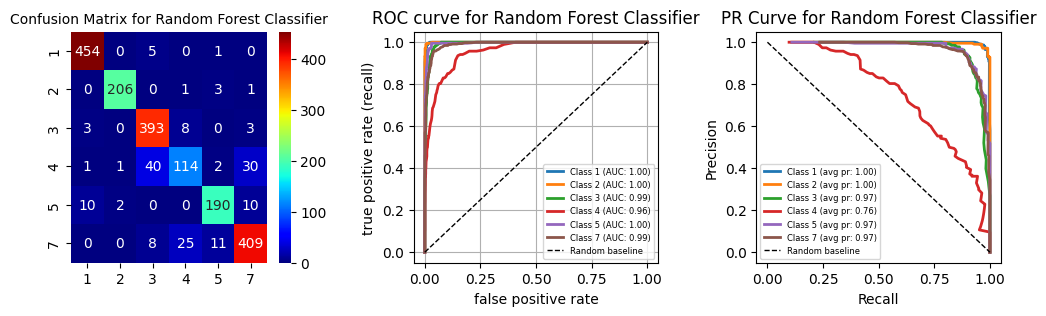

In [18]:
model=RandomForestClassifier()
model_name="Random Forest Classifier"
y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]

# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">XG boost</h5>

XG boost classifier Accuracy: 0.008803728638011392
Accuracy on orignal vs predicted values: 0.9171413775245987
Confusion Matrix:
 [[451   0   6   0   3   0]
 [  0 204   0   3   2   2]
 [  5   1 385  11   0   5]
 [  0   1  35 124   3  25]
 [  9   2   0   0 198   3]
 [  0   1   9  21  13 409]]
Report: 
1: {'precision': 0.9698924731182795, 'recall': 0.9804347826086957, 'f1-score': 0.9751351351351352, 'support': 460.0}
2: {'precision': 0.9760765550239234, 'recall': 0.966824644549763, 'f1-score': 0.9714285714285714, 'support': 211.0}
3: {'precision': 0.8850574712643678, 'recall': 0.9459459459459459, 'f1-score': 0.9144893111638955, 'support': 407.0}
4: {'precision': 0.779874213836478, 'recall': 0.6595744680851063, 'f1-score': 0.7146974063400576, 'support': 188.0}
5: {'precision': 0.9041095890410958, 'recall': 0.9339622641509434, 'f1-score': 0.9187935034802784, 'support': 212.0}
7: {'precision': 0.9211711711711712, 'recall': 0.9028697571743929, 'f1-score': 0.9119286510590858, 'support': 453.0

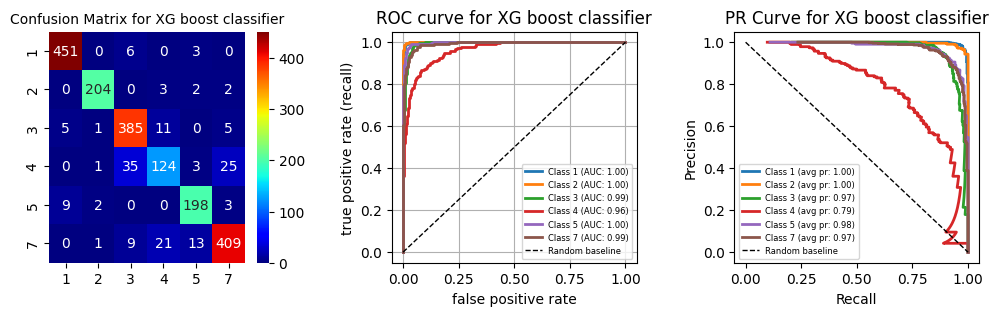

In [19]:
model=XGBClassifier(use_label_encoder=True)
model_name="XG boost classifier"
# # debug
y_test_bin=label_binarize(y_test,classes=classes_name)

encoder=LabelEncoder()
y_train_encoded=encoder.fit_transform(y_train)

model.fit(x_train,y_train_encoded)
# decoded
y_pred=model.predict(x_test)
y_pred=encoder.inverse_transform(y_pred)
# probability
y_prob=model.predict_proba(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v


roc_auc_ovr_micro=roc_auc_score(y_test_bin,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test_bin,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test_bin,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")
print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0,1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')

plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")

model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]


# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h5 style="color:cyan">Custome Model (ExtraTreeClassifier)</h5>

other Accuracy: 0.07871569135163128
Accuracy on orignal vs predicted values: 0.07871569135163128
Confusion Matrix:
 [[  0   0   0   0   0   0   0]
 [ 28  22  56  65 173 116   0]
 [  9   3  23 145   7  24   0]
 [136  51   0   0 218   2   0]
 [ 83   5   1   4  95   0   0]
 [ 60   0  97  29  14  12   0]
 [232   4  13   3 199   2   0]]
Report: 
0: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}
1: {'precision': 0.25882352941176473, 'recall': 0.04782608695652174, 'f1-score': 0.08073394495412844, 'support': 460.0}
2: {'precision': 0.12105263157894737, 'recall': 0.10900473933649289, 'f1-score': 0.11471321695760599, 'support': 211.0}
3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 407.0}
4: {'precision': 0.13456090651558072, 'recall': 0.5053191489361702, 'f1-score': 0.21252796420581654, 'support': 188.0}
5: {'precision': 0.07692307692307693, 'recall': 0.05660377358490566, 'f1-score': 0.06521739130434782, 'support': 212.0}
7: {'precision': 0.0, 'recall': 0.0,

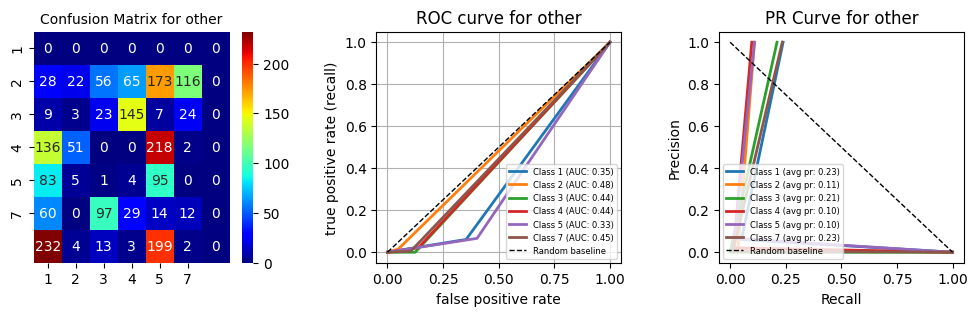

In [20]:
model=ExtraTreeClassifier(random_state=42)
model_name="other"
# x_traint=x_train*-1

y_test_bin=label_binarize(y_test,classes=classes_name)

model.fit(-x_train,y_train_encoded)
# decoded
y_pred=model.predict(x_test)
# probability
y_prob=model.predict_proba(x_test)


# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mAccuracy on orignal vs predicted values: \u001b[0m{accuracy_score(y_test,y_pred)}")
print(f"\u001b[33mConfusion Matrix:\n \u001b[0m{confusion_matrix(y_test,y_pred)}")
print("\u001b[33mReport: \u001b[0m")
for k,v in classification_report(y_test,y_pred,output_dict=True).items():
    print(f"{k}: {v}")

    if k in ['1','2','3','4','5','6','7']:
        model_scores[model_name]["scores"][k]=v

roc_auc_ovr_micro=roc_auc_score(y_test_bin,y_prob,multi_class="ovr",average="micro")
roc_auc_ovr_macro=roc_auc_score(y_test_bin,y_prob,multi_class="ovr",average="macro")
roc_auc_ovr_weighted=roc_auc_score(y_test_bin,y_prob,multi_class="ovr",average="weighted")
print(f"\u001b[33mROC AUC score:\u001b[0m\n(micro): {roc_auc_ovr_micro}\n(macro): {roc_auc_ovr_macro}\n(weighted): {roc_auc_ovr_weighted}")
avg_pr_micro= average_precision_score(y_test_bin, y_prob, average="micro")
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")
avg_pr_weighted = average_precision_score(y_test_bin, y_prob, average="weighted")
print(f"\u001b[33mPrecision Recall score:\u001b[0m\n(average PR): {avg_pr_micro}\n(average macro PR): {avg_pr_macro}\n(avrtage weighted): {avg_pr_weighted}")

print(f"{'-':-^130}")

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.4)

# Confusion matrix
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="jet",label=classes_name,xticklabels=classes_name, yticklabels=classes_name)
plt.title(f"Confusion Matrix for {model_name}",fontdict={"fontsize":10})

# ROC AUC  (per class)
plt.subplot(1,3,2)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes_name)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classes_name)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes_name[i]} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title(f"ROC curve for {model_name}")
plt.legend(loc="lower right",fontsize=6)
plt.grid(True)


# # ROC AUC  (combined into one)
# plt.subplot(1,3,3)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_name))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_name)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes_name)

roc_auc_macro = auc(all_fpr, mean_tpr)

# plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
#          label=f"ROC (AUC: {roc_auc_macro:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random baseline")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve - Dummy Classifier")
# plt.legend(loc="lower right",fontsize=6)
# plt.grid(True)

model_scores[model_name]["ROC"]=[all_fpr,mean_tpr]

## Percision recall
plt.subplot(1,3,3)

precision, recall, avg_pr = {}, {}, {}
for i in range(len(classes_name)):
    precision[i], recall[i], pr_thresholds = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    avg_pr[i] = average_precision_score(y_test_bin[:,i], y_prob[:,i])
    
for i in range(len(classes_name)):
    plt.plot(precision[i], recall[i], lw=2, label=f'Class {classes_name[i]} (avg pr: {avg_pr[i]:.2f})')


plt.plot([0, 1], [1, 0], 'k--', lw=1, label="Random baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve for {model_name}")
plt.legend(loc="lower left",fontsize=6)

# # PR curve (combined into one)
precision_macro, recall_macro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_prob.ravel()
)
avg_pr_macro = average_precision_score(y_test_bin, y_prob, average="macro")

model_scores[model_name]["PRC"]=[recall_macro,precision_macro,avg_pr_macro]
# x_train*=-1


# plt.figure(figsize=(7, 6))
# plt.plot(recall_macro, precision_macro, color='black', lw=2,
#          label=f"Macro-average PRC (AP = {avg_pr_macro:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Macro-average Precision–Recall Curve")
# plt.legend(loc="lower left")

plt.savefig(f"./assests/{model_name}_eval.png")

<h3 style="color:orange">Baseline evaluation</h3>

amoung all the 6 baseline model **Dummy Classifier** is performing very poorly having AUC=0.5 and PR score(macro)=0.16. also it was only able to predict one class correctly having total accuracy= 0.238 and weigthed average F1 score= 0.098

<h3 style="color:orange">Analysis for model selection</h3>

<h5 style="color:cyan">OvR approch for ROC curves</h5>

For a binary classifier, the ROC (Receiver Operating Characteristic) curve plots:
- True Positive Rate (TPR) (Recall or Sensitivity) on the Y-axis,
- False Positive Rate (FPR) on the X-axis, 
across different classification thresholds.
$$TPR=\frac{TP}{TP+FN}, FPR=\frac{FP}{FP+TN}$$

The Area Under the ROC Curve (AUC) measures how well the model separates the positive class from the negative class:
- AUC = 1.0 → perfect separation
- AUC = 0.5 → random guessing
- AUC < 0.5 → worse than random (inverted predictions)

problem here is we have more than 2 classes. so to solve for multiclass labels we use **One-vs-Rest (OvR)** strategy 

here for each class 'c':
- treat theat class a +ve class
- treat all othere classes as negitive class combined
- computer the Binary ROC curve and AUC fir the class.

this will give us one ROC curve & AUC per class. then we combine them using diffrent averages
- **micro-average:** compute global TPR/FPR by aggregating all true/false +ve across classes before computing the ROC
- **macro-average:** weighted by each class's support 
- **weighted-average:** Unweighted mean all per-class AUC's

steps for OvR ROC genration:
- binarize the labels
- get class probabilty score 
- computer ROC for each class 
- Combine for macro / micro averaging
    - micro-average: Flatten all classes together and compute a single global ROC/AUC.
    - Macro-average ROC: Compute the average of all individual class ROC curves. Then integrate area (AUC) this gives overall class-level separation.


[\* plots for all the models have been show below at the last cell of this ipynb book]

- model with highest Macro-average AUC is **XG boost classifier** with 0.9901 AUC then followed by **Randomforest Classifier** with 0.9891 AUC
- from baseline model there no such models having AUC <0.5 thought **Dummy Classifier** has AUC=0.5 but it doest satisfiy the threshold. in expiremental model given after baseline model **ExtraTreeClassifier (other)** has AUC=0.41 which has performe poor on this dataset. 

AUC value smaller than 0.5 implies the the model has **predected worst than random guessing**. this may be due to **inverted predicition** or **weak initialization of model weights**.

<h3 style="color:orange">Precision recall curve analysis</h3>


ROC can be misleading for imbalanced data for highly imbalanced datasets:
- Negatives (majority class) far outnumber positives (minority class).
- Even a small False Positive Rate (FPR) can correspond to many false positives in absolute numbers.
- Because ROC’s FPR denominator includes many true negatives (TN),
- the ROC curve can still look good (high AUC) even if the model is performing poorly on the minority (positive) class.
- ROC AUC may appear high even when the classifier fails to detect rare classes.

PRC focuses only on positive class performance, by plotting Precision (purity of positive predictions) against Recall (coverage of positives).
$$precision=\frac{TP}{TP+FP}, recall=\frac{TP}{TP+FN}$$

so
- No influence from the majority class (true negatives).
- Directly reflects how many positive predictions are actually correct (Precision) and how many of the true positives are recovered (Recall).

In imbalanced data, this is far more informative, because:
- A small increase in false positives drastically lowers Precision.
- Precision–Recall tradeoff better captures the cost of wrong positives (FPs) and missed positives (FNs).

PRC highlights the model’s ability to detect the minority class without being diluted by the abundance of true negatives.

This makes PRC a more informative and sensitive metric for evaluating how well a model detects minority classes. Even when class imbalance is moderate, PRC provides clearer insight into model performance on less represented classes.

[\* plot for PR curve are genrate at last cell of this .ipynb file]

- model with highest average Precision is **XG boost classifier** with 0.9943 average precision then followed by **Support Vector Classifier** with 0.991 average precision
- from baseline model with poor average Precision is **Dummy Classifier** has 0.213 and amoung all the models **ExtraTreeClassifier** has performed worts for this data having average precision=0.168


The Precision–Recall Curve (PRC) of the worst-performing model drops sharply as Recall increases because the model lacks discriminative ability.As the decision threshold is lowered to capture more positive samples (increasing Recall), the number of false positives grows rapidly while true positives increase slowly.Consequently, Precision decreases sharply, causing the PRC to fall towards the baseline level that corresponds to the class prior.This steep decline indicates that the model’s predicted probabilities do not effectively separate positive and negative classes — a characteristic behavior of uninformative or poorly trained classifiers.

<h3 style="color:orange">models score</h3>

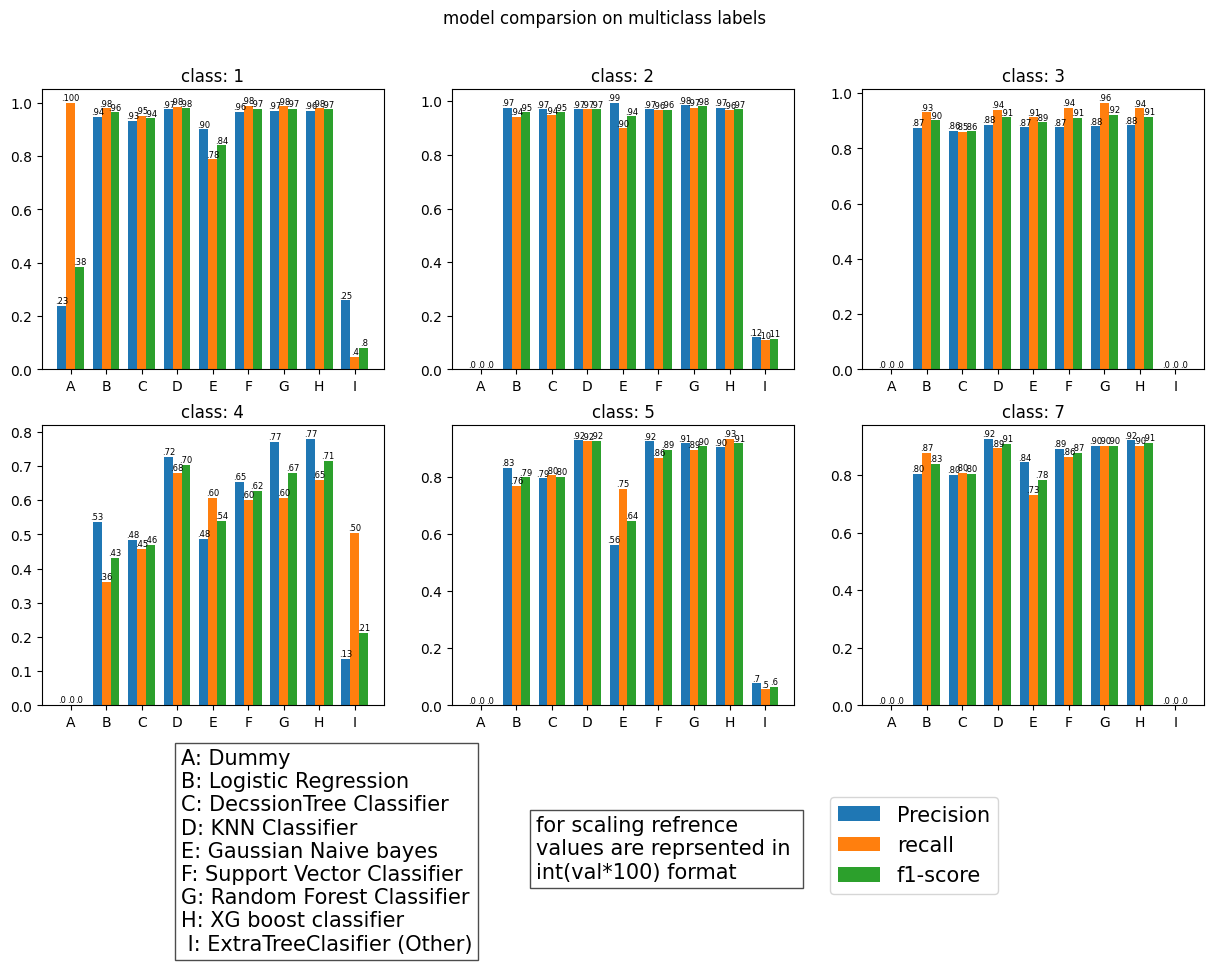

In [21]:
# change with respect to the above classess
dif_classes={int(z):{"precision":[],"recall":[],"f1-score":[]} for z in sorted(y_test.unique())}
model_names= [chr(ord('A')+i) for i in range(len(model_scores.keys()))]

for name,metric in model_scores.items():
    for k,v in metric["scores"].items():
        # print(k,v)
        dif_classes[int(k)]["precision"].append(v["precision"])
        dif_classes[int(k)]["recall"].append(v["recall"])
        dif_classes[int(k)]["f1-score"].append(v["f1-score"])


fig,ax=plt.subplots(2,3,figsize=(15,8))
fig.suptitle("model comparsion on multiclass labels")

for idx,(k,v) in enumerate(dif_classes.items()):
    [i-0.25 for i in range(len(model_scores))]
    ax[idx//3,idx%3].bar([i-0.25 for i in range(len(v["precision"]))],v["precision"],0.25,label="Precision")
    ax[idx//3,idx%3].bar([i for i in range(len(v["recall"]))],v["recall"],0.25,label="recall")
    ax[idx//3,idx%3].bar([i+0.25 for i in range(len(v["f1-score"]))],v["f1-score"],0.25,label="f1-score")

    # text on bar
    for j,val in enumerate(v["precision"]):
        ax[idx//3,idx%3].text(j-0.25,val+0.0075,f".{int(val*100)}",ha="center",fontdict={"fontsize":6})
    for j,val in enumerate(v["recall"]):
        ax[idx//3,idx%3].text(j,val+0.0075,f".{int(val*100)}",ha="center",fontdict={"fontsize":6})
    for j,val in enumerate(v["f1-score"]):
        ax[idx//3,idx%3].text(j+0.25,val+0.0075,f".{int(val*100)}",ha="center",fontdict={"fontsize":6})
    
    ax[idx//3,idx%3].set_xticks([i for i in range(len(model_names))],model_names)
    ax[idx//3,idx%3].set_title(f"class: {k}")



plt.text(-20, -0.85, "A: Dummy\nB: Logistic Regression " \
"\nC: DecssionTree Classifier\nD: KNN Classifier\nE: Gaussian Naive bayes\nF: Support Vector Classifier"\
"\nG: Random Forest Classifier\nH: XG boost classifier\n I: ExtraTreeClasifier (Other)", fontsize=15,
         bbox=dict(facecolor="white", alpha=0.7))

plt.text(-10, -0.6, "for scaling refrence \nvalues are reprsented in \nint(val*100) format", fontsize=15,
         bbox=dict(facecolor="white", alpha=0.7))

plt.legend(loc="center left", bbox_to_anchor=(-0.125, -0.5),fontsize=15,markerscale=2)

plt.subplots_adjust(wspace=0.2,hspace=0.2)


if "assests" not in os.listdir("./"):
    os.makedirs("assests")
plt.savefig(f"./assests/model comparision.png",bbox_inches="tight")

<h3 style="color:orange">ROC and PR curves</h3>

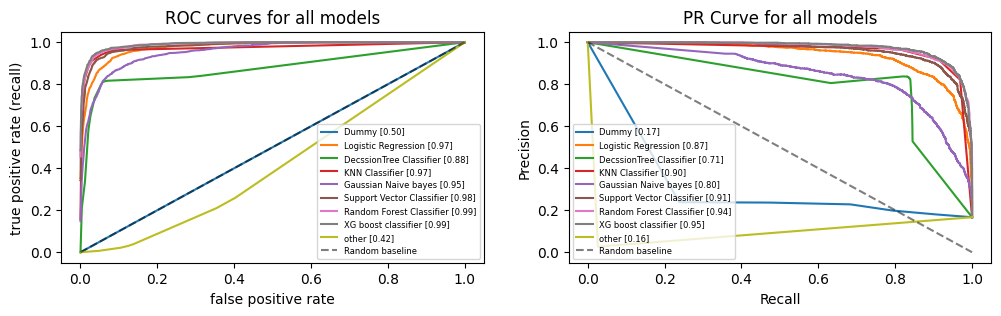

In [22]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
for name,attr in model_scores.items():
    # print(name)
    fpr,tpr=attr["ROC"]
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f"{name} [{roc_auc:.2f}]")

plt.plot([0, 1], [0, 1], 'k--',alpha=0.5, label="Random baseline")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.title("ROC curves for all models")
plt.legend(loc="lower right",fontsize=6)

plt.subplot(1,2,2)
for name,attr in model_scores.items():

    recall,precision,pr_score=attr["PRC"]
    plt.plot(recall,precision,label=f"{name} [{pr_score:.2f}]")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve for all models")
plt.plot([0, 1], [1, 0], 'k--',alpha=0.5, label="Random baseline")
plt.legend(loc="lower left",fontsize=6)

plt.savefig("./assests/ROC_AUC_PRC_of_all_models.png")

<h3 style="color:orange">Conclusion (Final Recommedations)</h3>

<h5 style="color:cyan">Synthesis</h5>

based on F1-score the ranking of models would be 

| Rank | Model                            |  F1-Score | ROC-AUC | PRC-AP |
| :--: | :------------------------------- | :-------: | :-----: | :----: |
|   1  | **XGBoost**                      | **0.901** |  0.990  |  0.975 |
|   2  | **KNN Classifier**               | **0.9**   |  0.973  |  0.930 |
|   3  | **Random Forest**                | **0.889** |  0.987  |  0.969 |
|   4  | **Support Vector Classifier**    | **0.876** |  0.982  |  0.960 |
|   5  | **Logistic Regression**          | **0.815** |  0.974  |  0.940 |
|   6  | **Decision Tree Classifier**     | **0.804** |  0.874  |  0.709 |
|   7  | **Gaussian Naive Bayes**         | **0.775** |  0.954  |  0.841 |
|   8  | **ExtraTree Classifier (Other)** | **0.067** |  0.416  |  0.162 |
|   9  | **Dummy**                        | **0.064** |  0.500  |  0.217 |

after seeing the table we can observe the rankings are not aligned. The rankings do not perfectly align, primarily because:
- F1-Score depends on a single threshold and is sensitive to imbalance between precision and recall.
- ROC–AUC evaluates overall separability and can look optimistic on imbalanced datasets.
- PRC–AP focuses on positive class performance, offering a stricter assessment when false positives are costly.
Hence, while ROC–AUC indicates that most models can distinguish classes well, PRC–AP and F1 reveal which models truly maintain precision and recall balance during classification. The PRC–AP metric is therefore more representative of real-world discriminative power in moderately imbalanced scenarios.

some specific trade-offs observed in this data:
- High ROC–AUC but Lower PRC–AP:\
Models such as Gaussian Naive Bayes show good ROC–AUC (0.954) but relatively lower PRC–AP (0.841).
This occurs because ROC–AUC evaluates ranking across both positive and negative classes — it can remain high even when a model struggles to achieve high precision on minority (positive) samples.
In contrast, PRC–AP focuses solely on positive-class precision and recall, penalizing false positives heavily.

- High F1 but Moderate AUC\
The Decision Tree Classifier demonstrates an F1-Score (0.804) that is slightly better than its AUC ranking (0.874).
This means the model performs reasonably well at a specific classification threshold but lacks consistent separability across all thresholds indicating overfitting to the training distribution.

- Aligned Top Performers\
XGBoost, Random Forest, and Support Vector Classifier maintain high values across all three metrics:
    - XGBoost achieves the best overall trade-off, with the highest ROC–AUC (0.99) and PRC–AP (0.975).
    - These models generalize well, ranking samples effectively while maintaining balanced precision and recall.

- Poor Baseline Models\
The Dummy and ExtraTree (Other) classifiers perform close to random, with very low F1 and PRC–AP, and ROC–AUC values near 0.5 — validating their role as reference baselines.

<h3 style="color:orange">Recommendation:</h3>

Based on the comprehensive analysis of all performance curves — including ROC, Precision–Recall (PRC), and F1-Score trends — the **XGBoost Classifier** proves to be most suitable model for this classification task.

XGBoost consistently achieved the highest ROC–AUC (0.990), highest PRC–AP (0.975), and one of the top F1-Scores (0.901) among all models tested.The ROC curve for XGBoost remains closest to the top-left corner, indicating excellent true positive detection across varying thresholds, while the PRC curve shows a steep rise and maintains high precision even at higher recall levels. This demonstrates that the model is both robust across thresholds and well-calibrated for distinguishing between classes.

Therefore, XGBoost represents the best trade-off between classification accuracy, ranking consistency, and precision–recall stability across decision thresholds. Its ensemble-based gradient boosting approach captures non-linear feature relationships effectively while maintaining generalization, making it ideal for this dataset.